In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
data_set=sns.get_dataset_names()
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [115]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [116]:
print(df.shape)

(150, 5)


In [117]:
print(df.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [118]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [119]:
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [122]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
df["Speciess"]=Encoder.fit_transform(df["species"])
df.drop("species",axis=1,inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,Speciess
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [123]:
x=df.drop("Speciess",axis=1)
print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [124]:
y=df["Speciess"]
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Speciess, Length: 150, dtype: int64


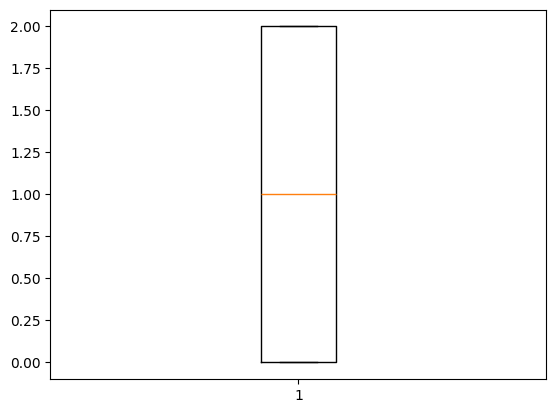

In [125]:
box_plot=plt.boxplot(x=df["Speciess"])

<ipython-input-127-bdcd47acbdb0>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(x=df[["sepal_length","sepal_width","petal_length"]],labels=["SpealLengthCm","Spealwidth","PetalLengthCm"])
<ipython-input-127-bdcd47acbdb0>:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


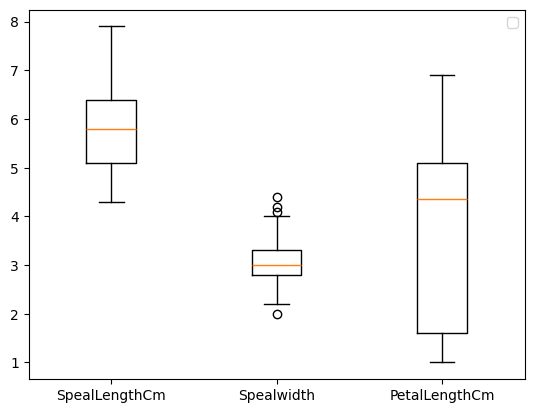

In [127]:
plt.boxplot(x=df[["sepal_length","sepal_width","petal_length"]],labels=["SpealLengthCm","Spealwidth","PetalLengthCm"])
plt.legend()

In [130]:
#removing the outliers in dataset
Q1=df["sepal_width"].quantile(0.25)
Q3=df["sepal_width"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-IQR*1.5
upper_limit=Q3+IQR*1.5
df1=df.loc[(df["sepal_width"]>lower_limit) & (df["sepal_width"]<upper_limit)]
df1["sepal_width"]

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


In [131]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
Scaled_df=min_max.fit_transform(df1)
new_data=pd.DataFrame(Scaled_df,columns=df.columns)
new_data

,sepal_length,sepal_width,petal_length,petal_width,Speciess
0,0.222222,0.722222,0.067797,0.041667,0.0
1,0.166667,0.444444,0.067797,0.041667,0.0
2,0.111111,0.555556,0.050847,0.041667,0.0
3,0.083333,0.500000,0.084746,0.041667,0.0
4,0.194444,0.777778,0.067797,0.041667,0.0
...,...,...,...,...,...
141,0.666667,0.444444,0.711864,0.916667,1.0
142,0.555556,0.166667,0.677966,0.750000,1.0
143,0.611111,0.444444,0.711864,0.791667,1.0
144,0.527778,0.666667,0.745763,0.916667,1.0


<ipython-input-133-65ad624c0b5c>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(x=new_data[["sepal_length","sepal_width","petal_length"]],labels=["SpealLengthCm","Spealwidth","PetalLengthCm"])
<ipython-input-133-65ad624c0b5c>:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


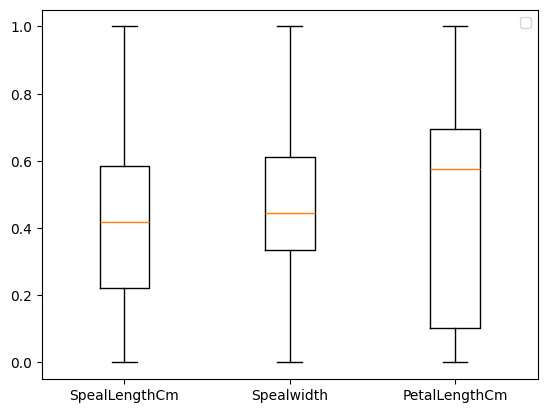

In [133]:
plt.boxplot(x=new_data[["sepal_length","sepal_width","petal_length"]],labels=["SpealLengthCm","Spealwidth","PetalLengthCm"])
plt.legend()

In [134]:
x1=df1.drop("Speciess",axis=1)
print(x1)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[146 rows x 4 columns]


In [135]:
y1=df1["Speciess"]
print(y1)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Speciess, Length: 146, dtype: int64


In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x1,y1,train_size=0.75,random_state=56)
model.fit(x_train,y_train)
#predication
predict_value=model.predict(x_test)
print(predict_value)

[0 1 0 0 2 1 1 0 2 0 2 0 2 2 2 2 2 2 1 1 1 2 0 0 0 2 0 1 2 1 2 1 2 0 1 1 1]


Text(0.5, 1.0, 'After Model train')

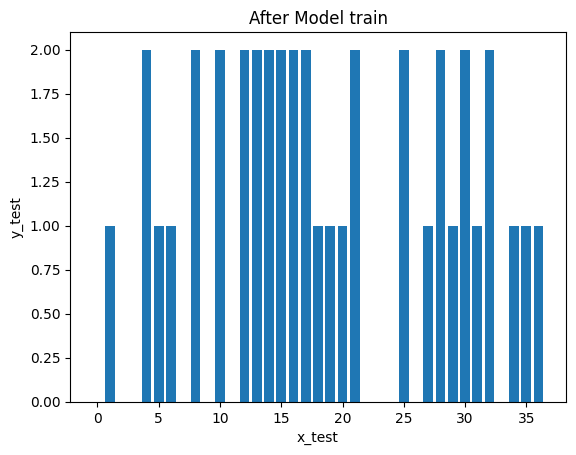

In [142]:
plt.bar(x_test,y_test)
plt.xlabel("x_test")
plt.ylabel("y_test")
plt.title("After Model train")

In [140]:
from sklearn.metrics import accuracy_score, precision_score,f1_score
accuracy_scoe=accuracy_score(y_test,predict_value)
print(accuracy_scoe*100)
precision_score=precision_score(y_test,predict_value, average="micro")
print(precision_score)
f1_score=f1_score(y_test,predict_value,average="micro")
print(f1_score)

100.0
1.0
1.0


37
37


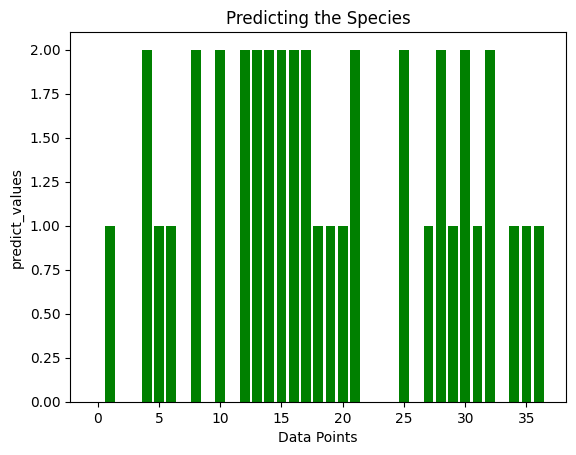

In [141]:
import matplotlib.pyplot as plt
print(len(predict_value))
print(len(x_test))
x_test=np.arange(len(predict_value))
plt.bar(x_test,predict_value,color="g")
plt.xlabel("Data Points")
plt.ylabel("predict_values")
plt.title("Predicting the Species")
plt.show()